In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load data
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Encode column Species to 0, 1 and 2:
df['Species'] = LabelEncoder().fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


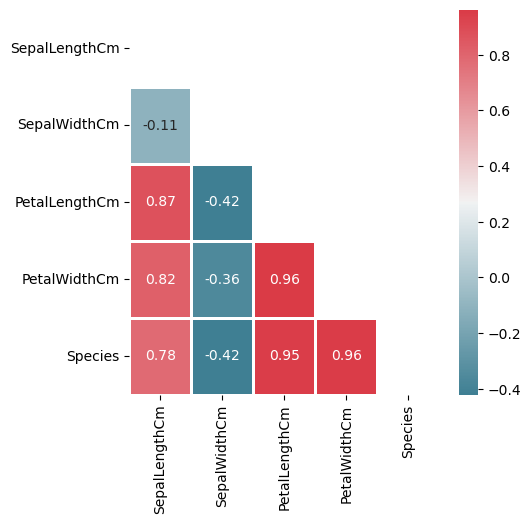

In [4]:
colormap = sns.diverging_palette(220, 10, as_cmap=True) # Select palette for heatmap:
corrs = df.corr() # get correlation coefficients
fig, ax = plt.subplots(figsize=(5, 5)) # plot figsize
dropSelf = np.zeros_like(corrs) # mask data for the same shape and type 
dropSelf[np.triu_indices_from(dropSelf)] = True # mask data in the mirrered side
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=1) # generate heatmap with correlation value to 2 decimal places 
plt.show()

In [5]:
# checking missing values:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Selecting numerical column values as X and checking data shape: 
X = df.iloc[:,0:5].values
X.shape

(150, 5)

In [7]:
# Standardize feature values:
X = StandardScaler().fit_transform(X)

In [8]:
# Apply PCA with the number of components = 3:
pca = PCA(n_components=3)
# obtain components
principal_components = pca.fit_transform(X)
# transform the components into a pandas data frame:
principal_components_df = pd.DataFrame(principal_components, index=df.index)
principal_components_df.head()

,0,1,2
Id,,,
1,-2.576198,0.498650,-0.047863
2,-2.419715,-0.660518,-0.195736
3,-2.662302,-0.326611,0.120244
4,-2.605790,-0.582925,0.142038
5,-2.683088,0.666354,0.109300


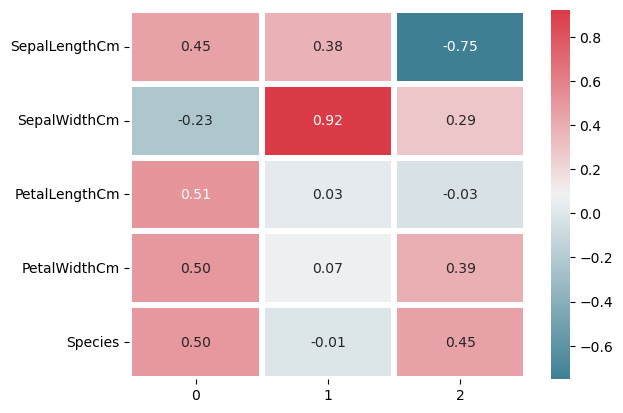

In [9]:
# Create a data frame of the PCA components and numerical column features:
iris_components_df = pd.DataFrame(pca.components_, columns = df.columns[:5]).transpose()
# Create a heatmap of PCA components vs numerical column features:
ax = sns.heatmap(iris_components_df, cmap = colormap, linewidth = 3, annot=True, fmt=".2f")
plt.show()

Comparing the two plots and looking at the original correlation between columns, I think that that PCA 1 is close to representing sepal width, PCA 2 is close to representing sepal length, whereas PCA 0 is close to a mixture of petal length, petal width and species, as the three variables correlate in a similar way to sepal length and sepal width. So to conclude I think that the redundancy of data stored in  petal length, petal width and species was removed and substituted with a signle principal componet = 0.  